# Sorting Array

In [1]:
import numpy as np

In [2]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [3]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [4]:
# bogosort is very slow
print(x[1:])
print(x[:-1])

[2 3 4 5]
[1 2 3 4]


In [5]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [6]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

# Fast Sorting

In [7]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to construct the sorted array if desired:

In [8]:
x[i]

array([1, 2, 3, 4, 5])

# sorting along row and columns

A useful feature of Numpy's sorting algorithms is the ability to sort along specific row s or columns of a multidimensional array using the axis argument. For example:

In [9]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [10]:
#sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [11]:
#sort each rows of X]
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# Partial Sorting

##### Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [12]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [13]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example : K-nearest neighbors

In [14]:
X = rand.rand(10, 2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

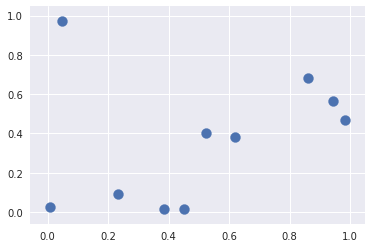

In [15]:
#To get an idea of how these points look, let's quickly scatter plot them:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:,1], s=100)


In [16]:
X[:, :]


array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [17]:
X[:, np.newaxis, :]

array([[[0.00706631, 0.02306243]],

       [[0.52477466, 0.39986097]],

       [[0.04666566, 0.97375552]],

       [[0.23277134, 0.09060643]],

       [[0.61838601, 0.38246199]],

       [[0.98323089, 0.46676289]],

       [[0.85994041, 0.68030754]],

       [[0.45049925, 0.01326496]],

       [[0.94220176, 0.56328822]],

       [[0.3854165 , 0.01596625]]])

In [18]:
X[np.newaxis, :, :]
#(1, 10, 2)

array([[[0.00706631, 0.02306243],
        [0.52477466, 0.39986097],
        [0.04666566, 0.97375552],
        [0.23277134, 0.09060643],
        [0.61838601, 0.38246199],
        [0.98323089, 0.46676289],
        [0.85994041, 0.68030754],
        [0.45049925, 0.01326496],
        [0.94220176, 0.56328822],
        [0.3854165 , 0.01596625]]])

In [19]:
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [20]:
X.shape

(10, 2)

In [21]:
X[:, np.newaxis, :].shape

(10, 1, 2)

In [22]:
X[np.newaxis, :, :].shape

(1, 10, 2)

In [23]:
X[:, np.newaxis, :]

array([[[0.00706631, 0.02306243]],

       [[0.52477466, 0.39986097]],

       [[0.04666566, 0.97375552]],

       [[0.23277134, 0.09060643]],

       [[0.61838601, 0.38246199]],

       [[0.98323089, 0.46676289]],

       [[0.85994041, 0.68030754]],

       [[0.45049925, 0.01326496]],

       [[0.94220176, 0.56328822]],

       [[0.3854165 , 0.01596625]]])

In [24]:
X[np.newaxis, :, :]

array([[[0.00706631, 0.02306243],
        [0.52477466, 0.39986097],
        [0.04666566, 0.97375552],
        [0.23277134, 0.09060643],
        [0.61838601, 0.38246199],
        [0.98323089, 0.46676289],
        [0.85994041, 0.68030754],
        [0.45049925, 0.01326496],
        [0.94220176, 0.56328822],
        [0.3854165 , 0.01596625]]])

In [25]:
X[:, np.newaxis, :] - X[np.newaxis, :, :]

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [26]:
(X[:, np.newaxis, :] - X[np.newaxis, :, :]).shape

(10, 10, 2)

In [27]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [28]:
dist_sq.shape

(10, 10)

This operation has a lot packed into it, and it might be a bit confusing if you're unfamiliar with NumPy's broadcasting rules. When you come across code like this, it can be useful to break it down into its component steps:

In [29]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [30]:
differences

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [32]:
# sum the coordinate differences to get the squared distance
sq_differences = differences ** 2
sq_differences

array([[[0.00000000e+00, 0.00000000e+00],
        [2.68021941e-01, 1.41977145e-01],
        [1.56810915e-03, 9.03817359e-01],
        [5.09427629e-02, 4.56219322e-03],
        [3.73711781e-01, 1.29168048e-01],
        [9.52897288e-01, 1.96870105e-01],
        [7.27394233e-01, 4.31971139e-01],
        [1.96632778e-01, 9.59902985e-05],
        [8.74478311e-01, 2.91843907e-01],
        [1.43148872e-01, 5.03556687e-05]],

       [[2.68021941e-01, 1.41977145e-01],
        [0.00000000e+00, 0.00000000e+00],
        [2.28588213e-01, 3.29354951e-01],
        [8.52659388e-02, 9.56383688e-02],
        [8.76308468e-03, 3.02724521e-04],
        [2.10182111e-01, 4.47586710e-03],
        [1.12336078e-01, 7.86502769e-02],
        [5.51683628e-03, 1.49456475e-01],
        [1.74245380e-01, 2.67084648e-02],
        [1.94206961e-02, 1.47375156e-01]],

       [[1.56810915e-03, 9.03817359e-01],
        [2.28588213e-01, 3.29354951e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.46353231e-02, 7.799

In [34]:
#sum the coordinate differences to get the squared distance

dist_sq = sq_differences.sum(-1)
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [35]:
dist_sq.shape

(10, 10)

In [36]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out! With the pairwise square-distances converted, we can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors:

In [37]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


### Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

### By using a full sort here, we've actually done more work than we need to in this case. If we're simply interested in the nearest k neighbors, all we need is to partition each row so that the smallest k+1 squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function:

In [38]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

#### In order to visualize this network of neighbors, let's quickly plot the points along with lines representing the connections from each point to its two nearest neighbors:

[(0.23277134043030423, 0.007066305219717406), (0.0906064345328208, 0.023062425041415757)]
[(0.007066305219717406, 0.007066305219717406), (0.023062425041415757, 0.023062425041415757)]
[(0.3854165025399161, 0.007066305219717406), (0.015966252220214194, 0.023062425041415757)]
[(0.5247746602583891, 0.5247746602583891), (0.3998609717152555, 0.3998609717152555)]
[(0.6183860093330873, 0.5247746602583891), (0.38246199126716274, 0.3998609717152555)]
[(0.450499251969543, 0.5247746602583891), (0.013264961159866528, 0.3998609717152555)]
[(0.04666566321361543, 0.04666566321361543), (0.9737555188414592, 0.9737555188414592)]
[(0.5247746602583891, 0.04666566321361543), (0.3998609717152555, 0.9737555188414592)]
[(0.6183860093330873, 0.04666566321361543), (0.38246199126716274, 0.9737555188414592)]
[(0.23277134043030423, 0.23277134043030423), (0.0906064345328208, 0.0906064345328208)]
[(0.3854165025399161, 0.23277134043030423), (0.015966252220214194, 0.0906064345328208)]
[(0.450499251969543, 0.23277134043

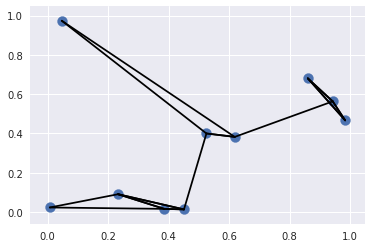

In [53]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        print(list(zip(X[j], X[i])))
        plt.plot(*zip(X[j], X[i]), color='black')


        

In [43]:
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [56]:
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        print(X[j], '-', X[i])

[0.23277134 0.09060643] - [0.00706631 0.02306243]
[0.00706631 0.02306243] - [0.00706631 0.02306243]
[0.3854165  0.01596625] - [0.00706631 0.02306243]
[0.52477466 0.39986097] - [0.52477466 0.39986097]
[0.61838601 0.38246199] - [0.52477466 0.39986097]
[0.45049925 0.01326496] - [0.52477466 0.39986097]
[0.04666566 0.97375552] - [0.04666566 0.97375552]
[0.52477466 0.39986097] - [0.04666566 0.97375552]
[0.61838601 0.38246199] - [0.04666566 0.97375552]
[0.23277134 0.09060643] - [0.23277134 0.09060643]
[0.3854165  0.01596625] - [0.23277134 0.09060643]
[0.45049925 0.01326496] - [0.23277134 0.09060643]
[0.52477466 0.39986097] - [0.61838601 0.38246199]
[0.94220176 0.56328822] - [0.61838601 0.38246199]
[0.61838601 0.38246199] - [0.61838601 0.38246199]
[0.98323089 0.46676289] - [0.98323089 0.46676289]
[0.94220176 0.56328822] - [0.98323089 0.46676289]
[0.85994041 0.68030754] - [0.98323089 0.46676289]
[0.85994041 0.68030754] - [0.85994041 0.68030754]
[0.94220176 0.56328822] - [0.85994041 0.68030754]
